In [1]:
import numpy as np
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmasher as cms

from regions import EllipseSkyRegion, RectangleSkyRegion

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)


I haven't quite been able to figure out what exactly all of these parameters are! So these images will get a little janky. 

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


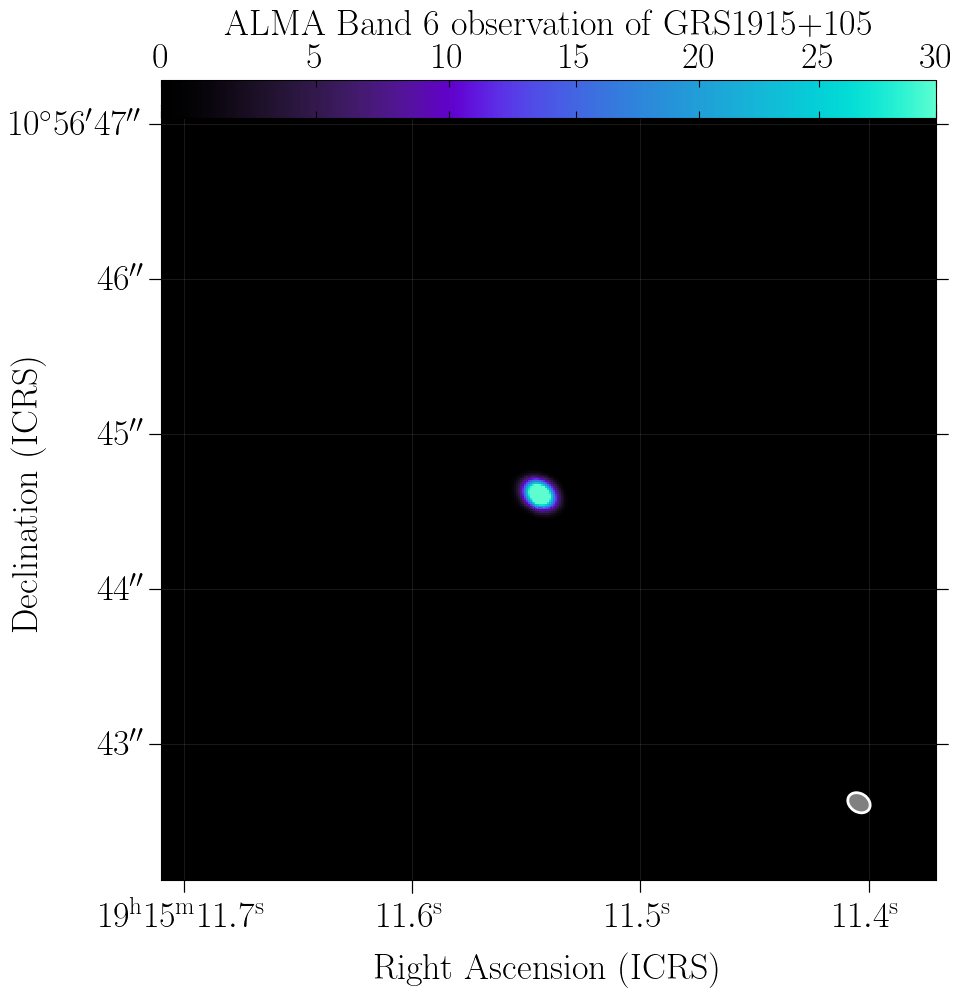

In [25]:
fig = plt.figure(figsize=(10,8))
label_fsize = 26
center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [5*u.arcsecond,5*u.arcsecond]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

bkg_fname = 'X119e_postcal_pb.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=30.0)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.3)
cbar.ax.set_title('ALMA Band 6 observation of GRS1915+105',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2*u.arcsec,-2*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

#plt.savefig('X119e_without_aplpy.eps')

Let's see if it'll work for the other bands as well!

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


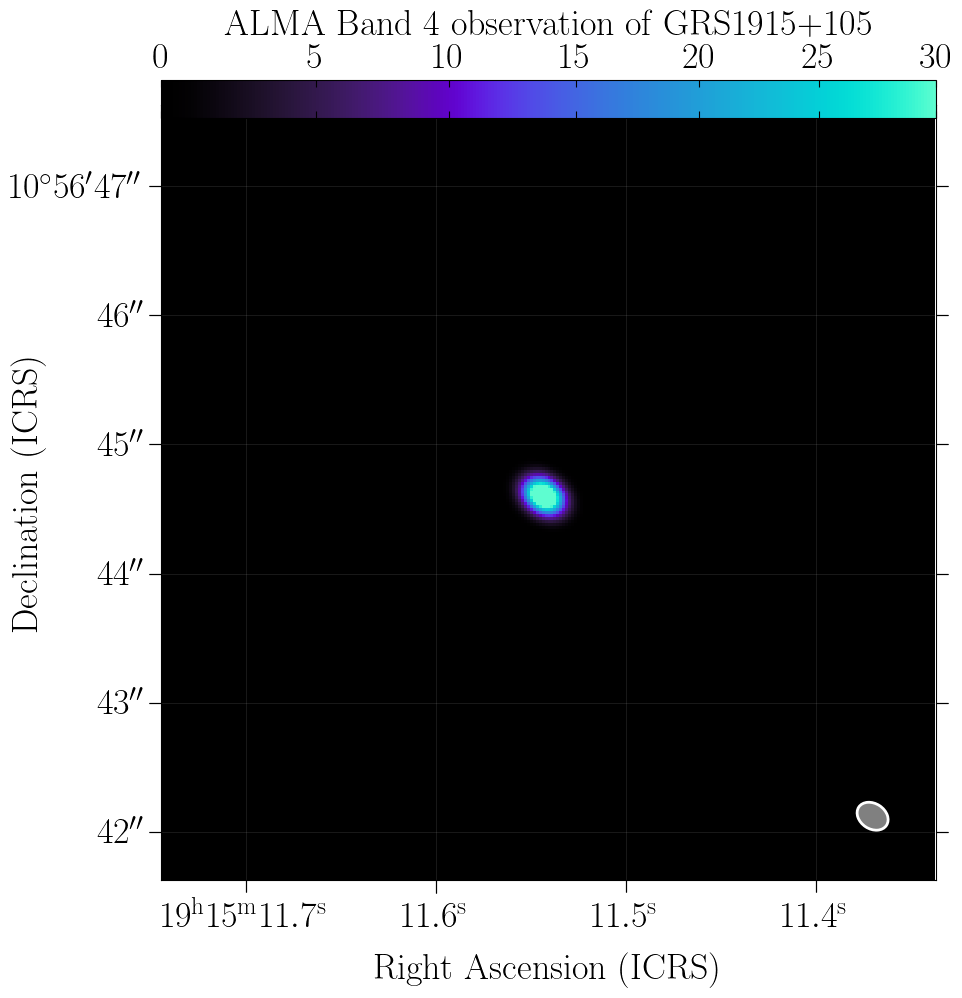

In [23]:
fig = plt.figure(figsize=(10,8))
label_fsize = 26
center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [6*u.arcsecond,6*u.arcsecond]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

bkg_fname = 'X1080_postcal_pb.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=30.0)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.3)
cbar.ax.set_title('ALMA Band 4 observation of GRS1915+105',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-2.5*u.arcsec,-2.5*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

#plt.savefig('X1080_without_aplpy.eps')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


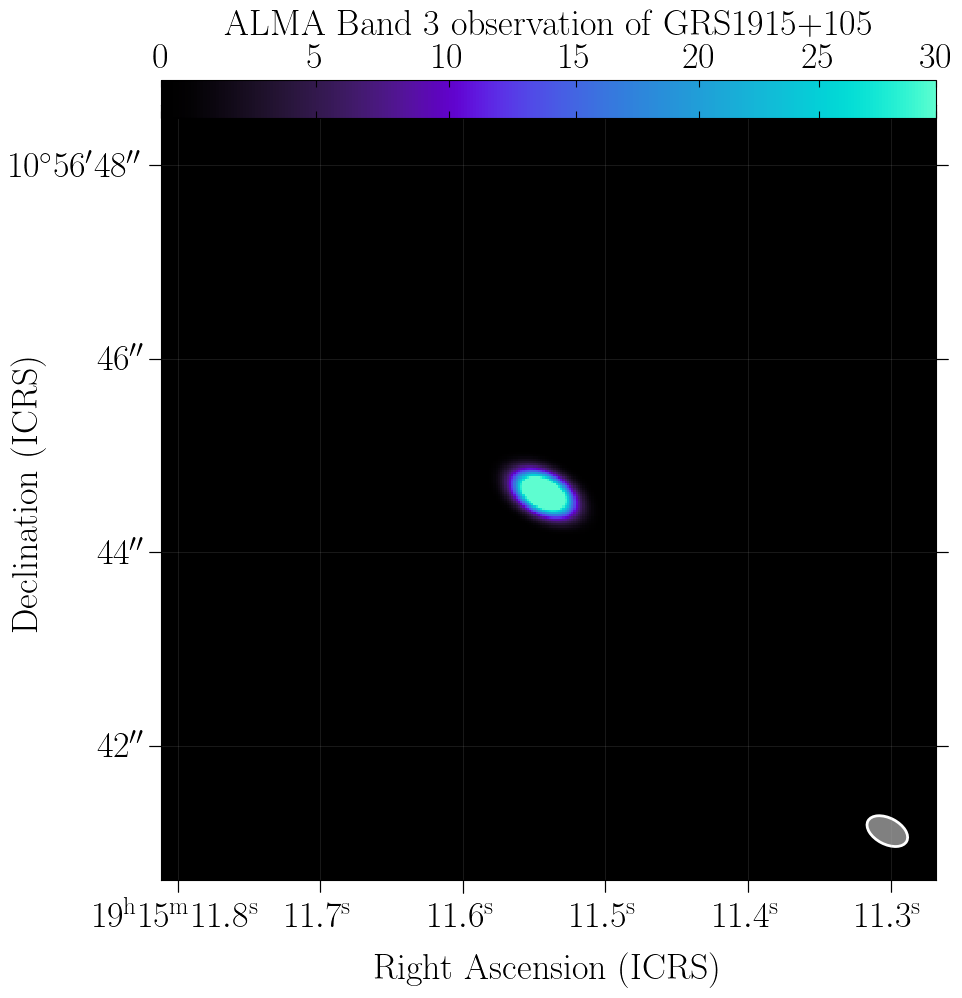

In [24]:
fig = plt.figure(figsize=(10,8))
label_fsize = 26
center = SkyCoord('19h15m11.54s', '10:56:44.62deg', frame='icrs')
box_bkg = [8*u.arcsecond,8*u.arcsecond]
box_contour1 = [0.6*u.arcmin,0.6*3.5/3*u.arcmin]

bkg_fname = 'XF60_postcal_pb.fits'
bkg_im  =  fits.open(bkg_fname)
bkg_data = bkg_im[0].data[0][0]*1e3
bkg_wcs = WCS(bkg_im[0].header, naxis=2)
bkg_cut = Cutout2D(bkg_data,center, box_bkg, wcs=bkg_wcs)

ax = plt.subplot2grid([1, 1], [0, 0], fig=fig, projection=bkg_cut.wcs)

cmap = cms.cosmic
cmap.set_bad('black')
cmap_norm = colors.PowerNorm(0.9, vmin=0, vmax=30.0)

ax_bkimg = ax.imshow(bkg_cut.data,
                     cmap = cmap,
                     norm = cmap_norm,
                     aspect = 'equal',
                     origin = 'lower', 
                     interpolation = 'none',
                     rasterized = True, transform=ax.get_transform(bkg_cut.wcs))

cbar = fig.colorbar(ax_bkimg, ax=ax,shrink=1., orientation='horizontal', pad=-1.3)
cbar.ax.set_title('ALMA Band 3 observation of GRS1915+105',fontsize=label_fsize,ha='center')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.tick_params(direction='in',length=5,bottom=True,top=True)
cbar.ax.xaxis.set_tick_params(labelsize=label_fsize)

meerkat_beam = EllipseSkyRegion(center.spherical_offsets_by(-3.5*u.arcsec,-3.5*u.arcsec),
                                bkg_im[0].header['BMIN']*u.deg,bkg_im[0].header['BMAJ']*u.deg,(bkg_im[0].header['BPA'])*u.deg)
meerkat_beam_pix_reg = meerkat_beam.to_pixel(bkg_cut.wcs)
meerkat_beam_pix_reg.visual['color'] = 'w'
meerkat_beam_pix_reg.visual['facecolor'] = '0.5'
meerkat_beam_pix_reg.visual['fill'] = True

meerkat_beam_pix_reg.visual['linewidth'] = 2.0
meerkat_beam_pix_reg.plot(ax=ax)

ax.grid(linewidth=0.5,alpha=0.2)
ax.tick_params(axis='both', which='major', length=9)
ax.set_ylabel(r"Declination (ICRS)", size=label_fsize,labelpad=-0.5)
ax.set_xlabel(r"Right Ascension (ICRS)", size=label_fsize,ha='center')
ax.tick_params(labelsize=label_fsize)

#plt.savefig('Xf60_without_aplpy.eps')